In [ ]:
import time

MODEL_NAME =  "runwayml/stable-diffusion-v1-5"
BRANCH = "main"

instance_prompt = "yltcaxe artstyle"
class_prompt =  "artstyle"
training_steps = 800
learning_rate = 1e-6
fp16 = True


from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
OUTPUT_DIR = "/content/output"
INSTANCE_DIR = '/content/drive/MyDrive/art_test_set_small'
CLASS_DIR = "/content/data/class"

!mkdir -p $INSTANCE_DIR
!mkdir -p $CLASS_DIR

!rm -rf $OUTPUT_DIR
!mkdir -p $OUTPUT_DIR

if 'pipe' in locals():
    del pipe


time_start = time.time()
def clear():
    from IPython.display import clear_output; return clear_output()

In [ ]:
!git clone https://github.com/huggingface/diffusers.git
%cd diffusers
%pip install .
%cd /content/diffusers/examples/dreambooth
%pip install -r requirements.txt
%pip install bitsandbytes #xformers torch==2.1.0+cu121 # gradio natsort safetensors xformers torch==2.1.0+cu121 accelerate
!accelerate config default


import bitsandbytes
import torch

Cloning into 'diffusers'...
remote: Enumerating objects: 64280, done.
remote: Counting objects: 100% (793/793), done.
remote: Compressing objects: 100% (429/429), done.
remote: Total 64280 (delta 506), reused 517 (delta 307), pack-reused 63487
Receiving objects: 100% (64280/64280), 47.96 MiB | 27.96 MiB/s, done.
Resolving deltas: 100% (46995/46995), done.
/content/diffusers
Processing /content/diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.30.0.dev0-py3-none-any.whl size=2209943 sha256=269125287b862bf7d19cc042f4c6c20211de404086c2d36f1338f947303f8ad2
  Stored in directory: /tmp/pip-ephem-wheel-cache-of8xpsmy/wheels/95/c5/3b/e1b4269f8a2584de57e75f949a185b48fc4144e9a91fc9965a
Successfully built diffusers
/content/diffusers/examples/dreambooth
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

### Training

In [ ]:
!accelerate launch train_dreambooth.py \
  --pretrained_model_name_or_path=$MODEL_NAME \
  --revision=$BRANCH \
  --instance_prompt="$instance_prompt" \
  --class_prompt="$class_prompt" \
  --class_data_dir=$CLASS_DIR \
  --instance_data_dir=$INSTANCE_DIR \
  --output_dir=$OUTPUT_DIR \
  --with_prior_preservation --prior_loss_weight=1.0 \
  --seed=1337 \
  --resolution=512 \
  --train_batch_size=1 \
  --train_text_encoder \
  --use_8bit_adam \
  --gradient_accumulation_steps=1 \
  --learning_rate=$learning_rate \
  --lr_scheduler="constant" \
  --lr_warmup_steps=0 \
  --num_class_images=50 \
  --sample_batch_size=4 \
  --max_train_steps=$training_steps

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
2024-06-17 11:27:10.234122: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-17 11:27:10.234172: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-17 11:27:10.356179: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] 

### Inference

In [ ]:
from diffusers import StableDiffusionPipeline,EulerDiscreteScheduler
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread
import numpy as np


test_dir = OUTPUT_DIR
pipe_test = StableDiffusionPipeline.from_pretrained(test_dir, safety_checker=None, torch_dtype=torch.float16).to("cuda")
pipe_test.scheduler = EulerDiscreteScheduler.from_config(pipe_test.scheduler.config)
g_cuda = None

/usr/local/lib/python3.10/dist-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/25 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


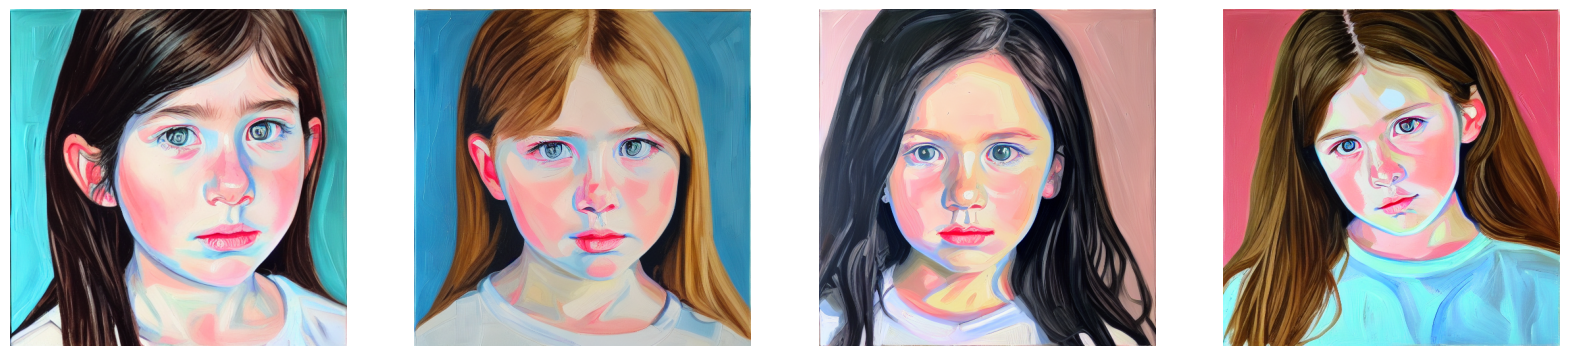

In [ ]:
prompt = "yltcaxe artstyle a girl"
negative_prompt = ""
num_samples = 4
guidance_scale = 7.5
num_inference_steps = 25
height = 512
width = 512
seed = 100

g_cuda = torch.Generator(device='cuda')

g_cuda.manual_seed(seed)

from torch import autocast
with autocast("cuda"), torch.inference_mode():
    images = pipe_test(
        prompt,
        height=height,
        width=width,
        negative_prompt=negative_prompt,
        num_images_per_prompt=num_samples,
        num_inference_steps=num_inference_steps,
        guidance_scale=guidance_scale,
        generator=g_cuda
    ).images

    fig=figure(figsize=(5*num_samples,5*num_samples))
    for i in range(num_samples):
        a=fig.add_subplot(1, num_samples,i+1)
        imshow(images[i])
        axis('off')


### Saving the model

In [ ]:
ckpt_path = OUTPUT_DIR + "/style_dreambooth_model.safetensors"

half_arg = "--half" if fp16 else ""
!python /content/diffusers/scripts/convert_diffusers_to_original_stable_diffusion.py \
    --use_safetensors \
    --model_path $OUTPUT_DIR \
    --checkpoint_path $ckpt_path $half_arg
print(f"[*] Converted ckpt saved at {ckpt_path}")

Renaming decoder.mid.attn_1.to_k.bias to decoder.mid.attn_1.k.bias
Renaming decoder.mid.attn_1.to_k.weight to decoder.mid.attn_1.k.weight
Renaming decoder.mid.attn_1.to_out.0.bias to decoder.mid.attn_1.proj_out.bias
Renaming decoder.mid.attn_1.to_out.0.weight to decoder.mid.attn_1.proj_out.weight
Renaming decoder.mid.attn_1.to_q.bias to decoder.mid.attn_1.q.bias
Renaming decoder.mid.attn_1.to_q.weight to decoder.mid.attn_1.q.weight
Renaming decoder.mid.attn_1.to_v.bias to decoder.mid.attn_1.v.bias
Renaming decoder.mid.attn_1.to_v.weight to decoder.mid.attn_1.v.weight
Renaming encoder.mid.attn_1.to_k.bias to encoder.mid.attn_1.k.bias
Renaming encoder.mid.attn_1.to_k.weight to encoder.mid.attn_1.k.weight
Renaming encoder.mid.attn_1.to_out.0.bias to encoder.mid.attn_1.proj_out.bias
Renaming encoder.mid.attn_1.to_out.0.weight to encoder.mid.attn_1.proj_out.weight
Renaming encoder.mid.attn_1.to_q.bias to encoder.mid.attn_1.q.bias
Renaming encoder.mid.attn_1.to_q.weight to encoder.mid.attn_1

In [ ]:
!cp -r '/content/output/style_dreambooth_model.safetensors' "/content/drive/MyDrive"